In [342]:
import numpy as np
import matplotlib.pyplot as plt

In [343]:
def aitken(x, y, xx):
    def aitken_scheme(x_):
      
        def aitken_step(k, L_prev):
            L_prev = np.array(L_prev)
            L_k = (1 / (x[k:n + 1] - x[:n - k])) * (L_prev[:n - k] * (x[k:n + 1] - x_) - ((x[:n - k] - x_) * L_prev[1:n - k + 1]))
            return L_k
        
        n = len(x) 
        L = [y.copy()]  
        for i in range(1, n):
            L.append(aitken_step(i, L[i-1])) 
        return L[n-1] 
    
    return np.vectorize(aitken_scheme)(xx) 
        

In [344]:
def newton(x, y, xx):
    m = x.size
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (x[k:m] - x[k - 1])
        print(a[k])
    n = m - 1
    yy = a[-1]
    for k in range(1, n + 1):
        yy = a[n - k] + (xx - x[n - k]) * yy
    return yy

## Проверка

0.6366197723675814
-0.4052847345693511
0.08600409182186532
0.0


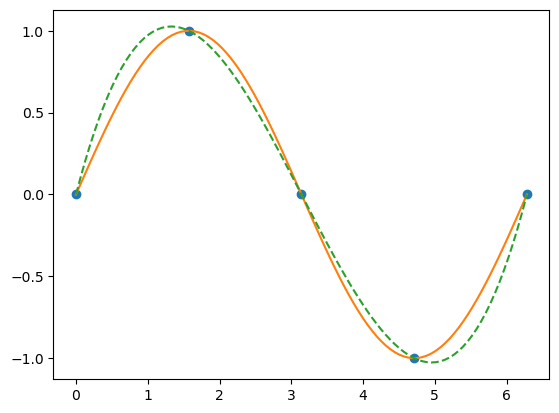

In [345]:
x = np.linspace(0, np.pi * 2, 5)
y = np.sin(x)
xx = np.linspace(0, np.pi * 2, 100)
yyl = aitken(x, y, xx)
yyn = newton(x, y, xx)
# print(yyl, yyn)
# assert np.allclose(yyl.T,)
plt.plot(x, y, 'o', xx, np.sin(xx), xx, yyn, '--')
plt.show()